In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('adyen-dataset.csv')

In [3]:
df.head()

,psp_reference,merchant,card_scheme,year,hour_of_day,minute_of_hour,day_of_year,is_credit,eur_amount,ip_country,issuing_country,device_type,ip_address,email_address,card_number,shopper_interaction,zip_code,card_bin,has_fraudulent_dispute,is_refused_by_adyen
0,79622457320,Merchant A,Other,2021,13,51,206,True,18.75,GR,GR,MacOS,i1oY1kTOXMlsFfoyhFJxyA,3XBRYto3QgX7g4pX-BvNyA,XldVNN9TQgIA2RE9FTC2TA,Ecommerce,XDED,4236,False,False
1,41293916020,Merchant C,Visa,2021,15,20,345,False,43.65,BR,BR,Android,HZkxQvtpScNLgi0fsoSkjA,klwgzdfrnz_6eGsHSi2prQ,zgRoL8pxX5LJI-SEPUTMvg,Ecommerce,AAD,4802,False,False
2,31382555255,Merchant E,Visa,2021,1,56,293,True,187.72,NL,NL,MacOS,HGW5EwBnHVgOrD5xYplBdw,XkMWeLLmXALPcV3ndwzKJw,T3BF1uOOqgcwaVRb_ujPQg,Ecommerce,1104,4526,False,False
3,13944051314,Merchant D,Visa,2021,12,50,242,False,109.16,NL,NL,iOS,8AuFEjK8m-0lxGAOJzOPmg,26Lw20NQtPKb5cyQZBuh1w,BMf1zFkJ1xvPMlOxC7RWTw,Ecommerce,2039,4571,False,True
4,62343575411,Merchant E,MasterCard,2021,19,26,318,True,46.27,BR,BR,Other,NaN,Y7tv2i85iUadkEIAPIufgg,jfxS2TIe0gR9vpOUdMKrBw,Ecommerce,XOL,4916,False,False


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138701 entries, 0 to 138700
Data columns (total 20 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   psp_reference           138701 non-null  int64  
 1   merchant                138701 non-null  object 
 2   card_scheme             138701 non-null  object 
 3   year                    138701 non-null  int64  
 4   hour_of_day             138701 non-null  int64  
 5   minute_of_hour          138701 non-null  int64  
 6   day_of_year             138701 non-null  int64  
 7   is_credit               138701 non-null  bool   
 8   eur_amount              138701 non-null  float64
 9   ip_country              138701 non-null  object 
 10  issuing_country         138701 non-null  object 
 11  device_type             138701 non-null  object 
 12  ip_address              110961 non-null  object 
 13  email_address           124831 non-null  object 
 14  card_number         

In [13]:
df.columns

Index(['psp_reference', 'merchant', 'card_scheme', 'year', 'hour_of_day',
       'minute_of_hour', 'day_of_year', 'is_credit', 'eur_amount',
       'ip_country', 'issuing_country', 'device_type', 'ip_address',
       'email_address', 'card_number', 'shopper_interaction', 'zip_code',
       'card_bin', 'has_fraudulent_dispute', 'is_refused_by_adyen'],
      dtype='object')

In [18]:
df.isnull().any()

psp_reference             False
merchant                  False
card_scheme               False
year                      False
hour_of_day               False
minute_of_hour            False
day_of_year               False
is_credit                 False
eur_amount                False
ip_country                False
issuing_country           False
device_type               False
ip_address                 True
email_address              True
card_number               False
shopper_interaction       False
zip_code                   True
card_bin                  False
has_fraudulent_dispute    False
is_refused_by_adyen       False
dtype: bool

EDA

* Q1: real fraud usually related to which information.
is_credit = true, shopper_interaction = Ecommerce

* Q2: real frauds cases related to amounts? same distribution
* Q3: real frauds happens normally to same cards ? not really

In [20]:
df_shopper_interaction = df.groupby(['has_fraudulent_dispute','shopper_interaction']).size()
# all coming from e-commerce

has_fraudulent_dispute  shopper_interaction
False                   Ecommerce              115647
                        POS                     12338
True                    Ecommerce               10716
dtype: int64

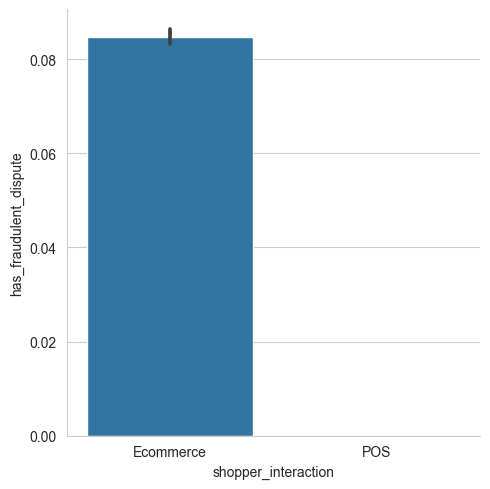

In [43]:
sns.catplot(data=df, y="has_fraudulent_dispute", x="shopper_interaction", kind="bar")

In [23]:
df.groupby(['has_fraudulent_dispute','merchant']).size()

has_fraudulent_dispute  merchant  
False                   Merchant A    51097
                        Merchant B    25508
                        Merchant C    12831
                        Merchant D    25592
                        Merchant E    12957
True                    Merchant A     4247
                        Merchant B     2184
                        Merchant C     1026
                        Merchant D     2228
                        Merchant E     1031
dtype: int64

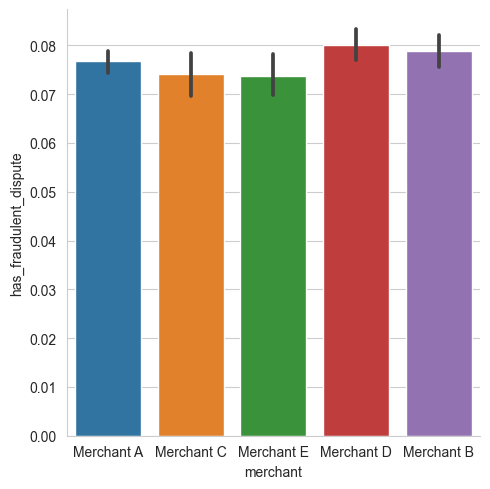

In [42]:
sns.catplot(data=df, y="has_fraudulent_dispute", x="merchant", kind="bar")

In [28]:
df.groupby(['has_fraudulent_dispute','card_scheme']).size()

has_fraudulent_dispute  card_scheme
False                   Amex           12921
                        MasterCard     38593
                        Other          31827
                        Visa           44644
True                    Amex            1135
                        MasterCard      3207
                        Other           2725
                        Visa            3649
dtype: int64

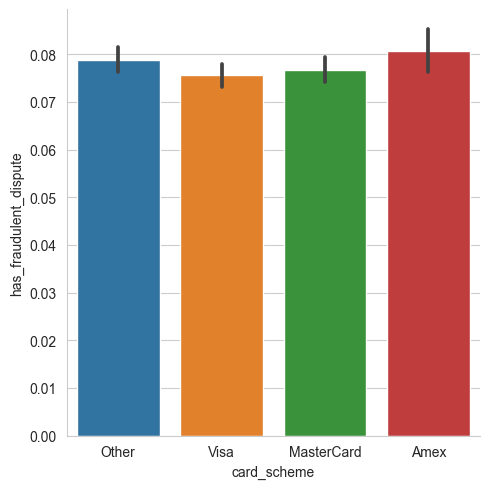

In [41]:
sns.catplot(data=df, y="has_fraudulent_dispute", x="card_scheme", kind="bar")

In [29]:
df.groupby(['has_fraudulent_dispute','is_credit']).size()
# is_credit always true for fraudulent_dispute

has_fraudulent_dispute  is_credit
False                   False        37369
                        True         90616
True                    True         10716
dtype: int64

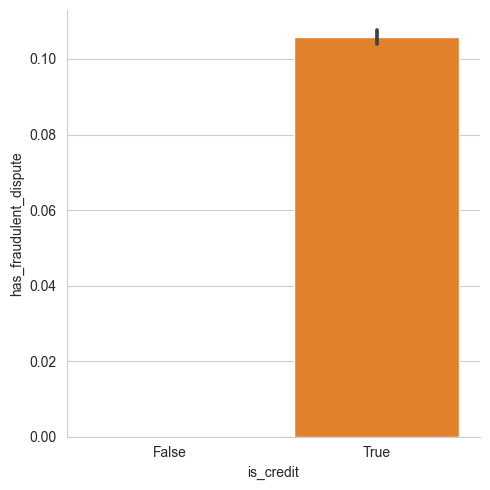

In [39]:
sns.catplot(data=df, y="has_fraudulent_dispute", x="is_credit", kind="bar")

In [30]:
df.groupby(['has_fraudulent_dispute','device_type']).size()

has_fraudulent_dispute  device_type
False                   Android        21246
                        Linux          21297
                        MacOS          21236
                        Other          21569
                        Windows        21431
                        iOS            21206
True                    Android         1521
                        Linux           1508
                        MacOS           1575
                        Other           3104
                        Windows         1588
                        iOS             1420
dtype: int64

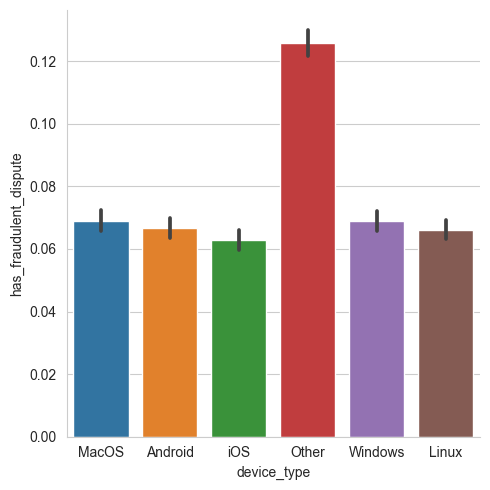

In [40]:
sns.catplot(data=df, y="has_fraudulent_dispute", x="device_type", kind="bar")

In [32]:
df.groupby(['has_fraudulent_dispute','issuing_country']).size()

has_fraudulent_dispute  issuing_country
False                   BR                 27218
                        GR                 27286
                        IT                  9277
                        NL                 36853
                        ZW                 27351
True                    BR                  3048
                        GR                  1540
                        IT                  1525
                        NL                  3118
                        ZW                  1485
dtype: int64

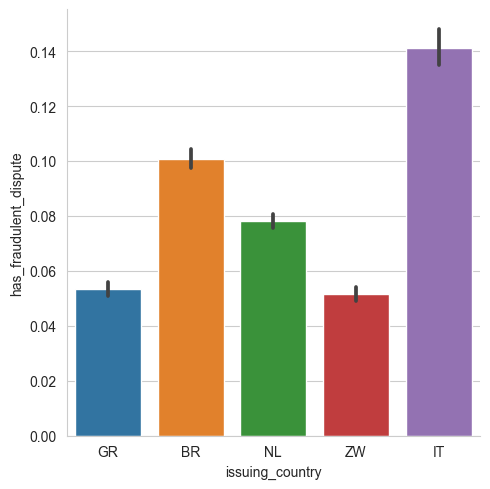

In [44]:
sns.catplot(data=df, y="has_fraudulent_dispute", x="issuing_country", kind="bar")

In [42]:
df_fraud = df[df['has_fraudulent_dispute']==True]
df_notfraud = df[df['has_fraudulent_dispute']==False]

(array([2.588e+03, 2.720e+03, 1.697e+03, 1.058e+03, 7.180e+02, 4.680e+02,
        3.420e+02, 2.300e+02, 1.730e+02, 1.360e+02, 1.080e+02, 6.100e+01,
        6.800e+01, 4.900e+01, 5.400e+01, 3.900e+01, 2.700e+01, 2.400e+01,
        1.300e+01, 1.600e+01, 2.100e+01, 1.200e+01, 1.700e+01, 5.000e+00,
        9.000e+00, 1.000e+00, 3.000e+00, 5.000e+00, 4.000e+00, 3.000e+00]),
 array([   0.        ,   33.33333333,   66.66666667,  100.        ,
         133.33333333,  166.66666667,  200.        ,  233.33333333,
         266.66666667,  300.        ,  333.33333333,  366.66666667,
         400.        ,  433.33333333,  466.66666667,  500.        ,
         533.33333333,  566.66666667,  600.        ,  633.33333333,
         666.66666667,  700.        ,  733.33333333,  766.66666667,
         800.        ,  833.33333333,  866.66666667,  900.        ,
         933.33333333,  966.66666667, 1000.        ]),
 <BarContainer object of 30 artists>)

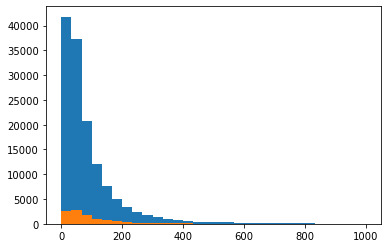

In [41]:
plt.hist(df.eur_amount,bins=30,range=(0,1000))
plt.hist(df_fraud.eur_amount,bins=30,range=(0,1000))

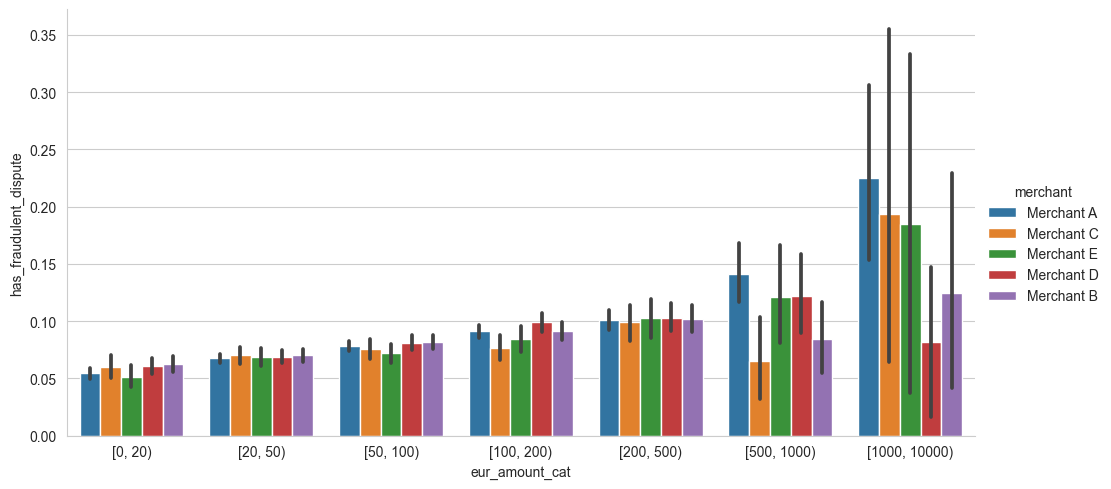

In [50]:
df_eur_amount = pd.cut(df.eur_amount, [0,20,50,100,200,500,1000,10000],right=False)
df["eur_amount_cat"] = df_eur_amount
sns.catplot(data=df, y="has_fraudulent_dispute", x="eur_amount_cat", hue="merchant",kind="bar", aspect = 2)

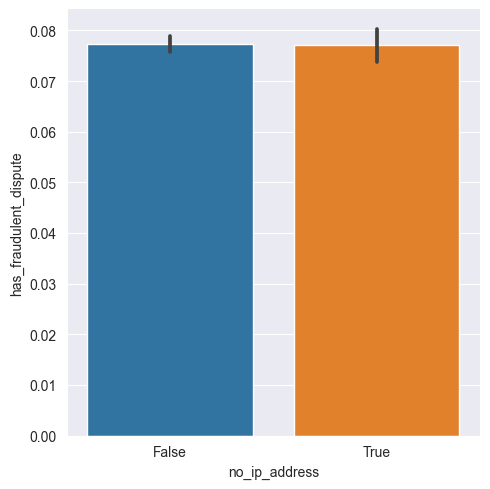

In [11]:
df['no_ip_address'] = df['ip_address'].isna()
sns.catplot(data=df, y="has_fraudulent_dispute", x="no_ip_address", kind="bar")

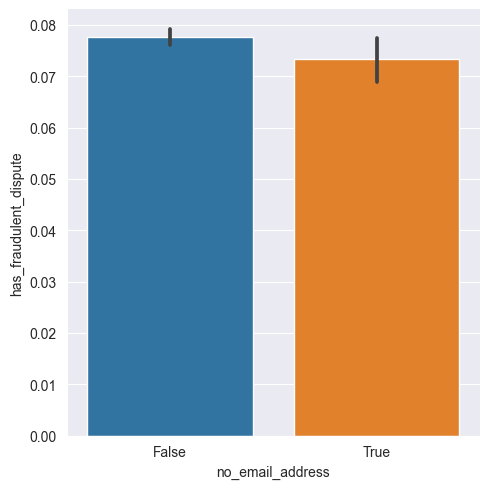

In [12]:
df['no_email_address'] = df['email_address'].isna()
sns.catplot(data=df, y="has_fraudulent_dispute", x="no_email_address", kind="bar")

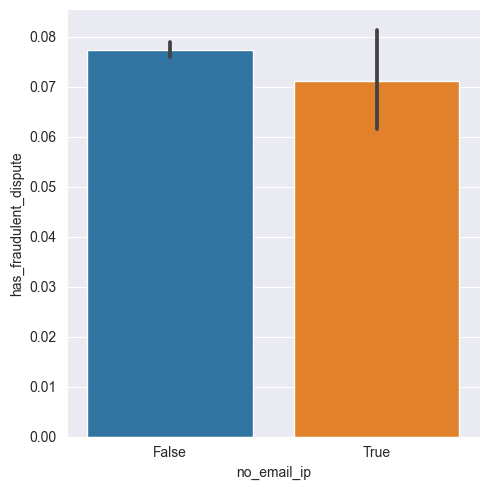

In [15]:
df['no_email_ip'] = (df['ip_address'].isna()) & (df['email_address'].isna())
sns.catplot(data=df, y="has_fraudulent_dispute", x="no_email_ip", kind="bar")

In [49]:
df['card_number'].value_counts()

138701

In [50]:
df_fraud['card_number'].value_counts()

gLZvKVK0zdRzRlhufrrZjQ    49
tILz9SCTB-jZcC3KBe1tgA    38
5YoeBI22nfwwEYpD8iI24Q    36
AJWnL6gryOz8O6hm1jsbxg    36
PM14M6gMRcjxYFG3F7vEaw    33
                          ..
TWKRGJ0iKDwxAGAfeVUOtA     1
3mHg_3mFXdW-CnzjAb3CMQ     1
eoWJIHW5yYvBcwekz72kkQ     1
JFWBnqfvQAUIO04TIDo2Kg     1
8pRRhuIhqAhkd79KdVV9tw     1
Name: card_number, Length: 2049, dtype: int64

In [56]:
df_fraud[df_fraud['card_number'].isin(df_notfraud['card_number'])]['card_number'].value_counts()

gLZvKVK0zdRzRlhufrrZjQ    49
tILz9SCTB-jZcC3KBe1tgA    38
5YoeBI22nfwwEYpD8iI24Q    36
AJWnL6gryOz8O6hm1jsbxg    36
PM14M6gMRcjxYFG3F7vEaw    33
                          ..
KDYPA7cDg3W8AemYsok8lw     1
SFsT_X-IwnjSAJiLRQ43WQ     1
7IFl3X-KA14SqpFvTflPQQ     1
7xQlAC5RRXLRk1SdtzVSZQ     1
mp632U4XKdZvpM9HGqqLgA     1
Name: card_number, Length: 1025, dtype: int64

In [55]:
df_notfraud[df_notfraud['card_number'].isin(df_fraud['card_number'])]['card_number'].value_counts()

S2kBLWhAn7XUlslZJqpmmw    40
DM9ee_c6UK_UF531p5HQ6w    29
AJWnL6gryOz8O6hm1jsbxg    28
FWG49jEpjxK0wW8ITkfDKg    27
tILz9SCTB-jZcC3KBe1tgA    26
                          ..
Ueta-Qw220ds-xXWk2Uddg     1
bhemVZvEZ_XoI04cDf5fVA     1
tjNJ9wEtTC82t_CRX-Uzbg     1
2B-_idFl7aXP6oMbXAhFRg     1
GRWf7B5VI-6uYavbg_aWHQ     1
Name: card_number, Length: 1025, dtype: int64

<AxesSubplot:>

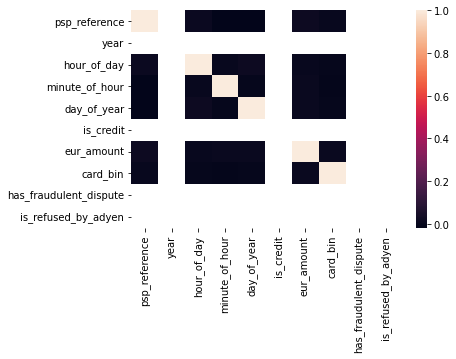

In [58]:
import seaborn as sns
sns.heatmap(df_fraud.corr())